In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

In [83]:
base = pd.read_csv("../Data/credito.csv")
base.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [84]:
base.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [85]:
print(base['Emprego'].value_counts(dropna=False))
print(base['ResidenciaDesde'].value_counts(dropna=False))
print(base['Habitacao'].value_counts(dropna=False))

Emprego
3.0    338
2.0    247
4.0    172
1.0    171
5.0     62
NaN     10
Name: count, dtype: int64
ResidenciaDesde
4.0    409
2.0    308
3.0    147
1.0    129
NaN      7
Name: count, dtype: int64
Habitacao
1.0    709
3.0    175
2.0    107
NaN      9
Name: count, dtype: int64


In [86]:
# Criando colunas indicadoras de nulos e preenchendo com a moda
# Emprego
base['Emprego_nulo'] = base['Emprego'].isnull().astype(int)
base['Emprego'] = base['Emprego'].fillna(base['Emprego'].mode()[0])

# ResidenciaDesde
base['ResidenciaDesde_nulo'] = base['ResidenciaDesde'].isnull().astype(int)
base['ResidenciaDesde'] = base['ResidenciaDesde'].fillna(base['ResidenciaDesde'].mode()[0])

# Habitacao
base['Habitacao_nulo'] = base['Habitacao'].isnull().astype(int)
base['Habitacao'] = base['Habitacao'].fillna(base['Habitacao'].mode()[0])

In [87]:
X = base.drop('Status', axis=1)
y = base['Status']

In [88]:
print(y.value_counts())

Status
1    700
0    300
Name: count, dtype: int64


In [89]:
# Aplicando SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [90]:
# Verificando a distribuição das classes após o balanceamento
print(Counter(y_resampled))

Counter({0: 700, 1: 700})


In [91]:
# Dividindo novamente os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [92]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [93]:
X_train.isnull().sum()

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Emprego_nulo            0
ResidenciaDesde_nulo    0
Habitacao_nulo          0
dtype: int64

In [112]:
floresta = RandomForestClassifier(n_estimators=200, random_state=0)
floresta.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [113]:
y_pred = floresta.predict(X_test)
print("\nRelatório de classificação no teste:")
print(classification_report(y_test, y_pred))


Relatório de classificação no teste:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       218
           1       0.76      0.82      0.79       202

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420



In [111]:
print(f"Acurácia no teste: {accuracy_score(y_test, y_pred):.4f}")

Acurácia no teste: 0.7857


In [100]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [101]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[166,  52],
       [ 36, 166]])

In [102]:
taxa_acerto = accuracy_score(y_test, y_pred)
taxa_acerto

0.7904761904761904

In [103]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.20952380952380956

In [104]:
scores = cross_val_score(floresta, X, y, cv=5)  # Aqui, cv=5 significa 5 folds
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.735 0.73  0.73  0.73  0.71 ]
Mean cross-validation score: 0.727


In [105]:
importances = floresta.feature_importances_

In [106]:
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importancias_df = importancias_df.sort_values(by='Importance', ascending=False)

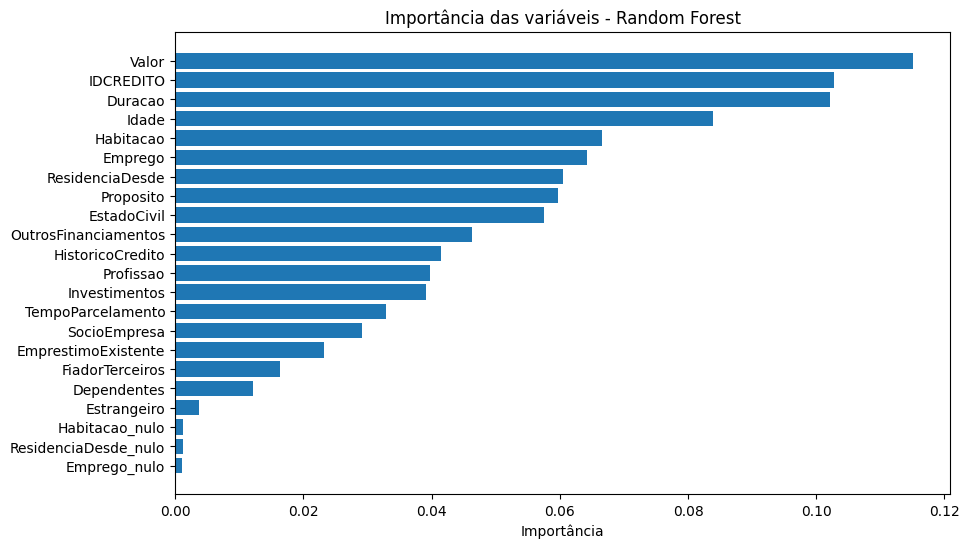

In [107]:
plt.figure(figsize=(10,6))
plt.barh(importancias_df['Feature'], importancias_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.title('Importância das variáveis - Random Forest')
plt.show()

In [108]:
import joblib

# Salvando o modelo
# joblib.dump(floresta, 'modelo_rf.pkl')

In [50]:
modelo_carregado = joblib.load('modelo_rf.pkl')

In [51]:
print(modelo_carregado.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [52]:
print(floresta.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [53]:
importances = modelo_carregado.feature_importances_
features = X.columns  # Garanta que X tenha as colunas na mesma ordem

for f, imp in zip(features, importances):
    print(f"{f}: {imp:.4f}")


IDCREDITO: 0.1018
Duracao: 0.1034
HistoricoCredito: 0.0418
Proposito: 0.0610
Valor: 0.1137
Investimentos: 0.0395
Emprego: 0.0633
TempoParcelamento: 0.0324
EstadoCivil: 0.0594
FiadorTerceiros: 0.0161
ResidenciaDesde: 0.0617
Idade: 0.0854
OutrosFinanciamentos: 0.0450
Habitacao: 0.0650
EmprestimoExistente: 0.0234
Profissao: 0.0383
Dependentes: 0.0118
SocioEmpresa: 0.0293
Estrangeiro: 0.0040
Emprego_nulo: 0.0012
ResidenciaDesde_nulo: 0.0012
Habitacao_nulo: 0.0013


In [54]:
importances = floresta.feature_importances_
features = X.columns  # Garanta que X tenha as colunas na mesma ordem

for f, imp in zip(features, importances):
    print(f"{f}: {imp:.4f}")


IDCREDITO: 0.1028
Duracao: 0.1021
HistoricoCredito: 0.0414
Proposito: 0.0597
Valor: 0.1151
Investimentos: 0.0391
Emprego: 0.0642
TempoParcelamento: 0.0329
EstadoCivil: 0.0575
FiadorTerceiros: 0.0164
ResidenciaDesde: 0.0605
Idade: 0.0839
OutrosFinanciamentos: 0.0464
Habitacao: 0.0665
EmprestimoExistente: 0.0232
Profissao: 0.0397
Dependentes: 0.0121
SocioEmpresa: 0.0291
Estrangeiro: 0.0038
Emprego_nulo: 0.0011
ResidenciaDesde_nulo: 0.0012
Habitacao_nulo: 0.0012
